Train Model

In [ ]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.286, seed=70),
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [ ]:
get_image_files("train")

(#47996) [Path('train/fake/18363_Brown_Hair_img005954.jpg'),Path('train/fake/23297_images_img009722.jpg'),Path('train/fake/8191_images_img002009.jpg'),Path('train/fake/21384_images_img000033.jpg'),Path('train/fake/1150_images_img008190.jpg'),Path('train/fake/3896_images_img007768.jpg'),Path('train/fake/21884_Brown_Hair_img004337.jpg'),Path('train/fake/14942_part1_img000305.jpg'),Path('train/fake/1511_Black_Hair_img001138.jpg'),Path('train/fake/1962_part1_img003885.jpg')...]

In [ ]:
parent_label("train/fake/17325_Male_img006646.jpg")

'fake'

In [ ]:
dls = fields.dataloaders("train")

In [ ]:
listdls = dls.vocab
listdls

['fake', 'real']

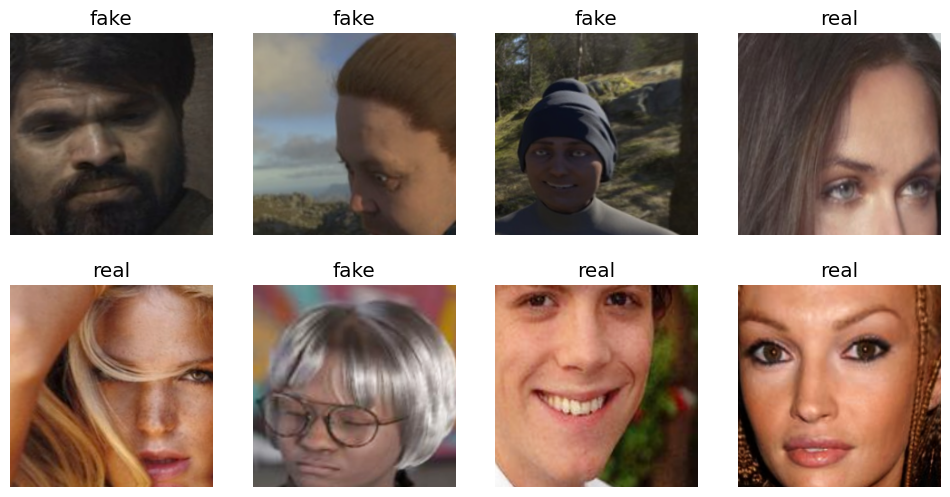

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
learner = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 128MB/s]


In [ ]:
learner.lr_find()

In [ ]:
learner.fine_tune(epochs=3, freeze_epochs=1, base_lr=0.0014454397605732083)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.195605,0.114892,0.044692,0.955308,03:32


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.062333,0.034185,0.013126,0.986874,04:25
1,0.029272,0.009167,0.003125,0.996875,04:25
2,0.019407,0.008381,0.003334,0.996666,04:25


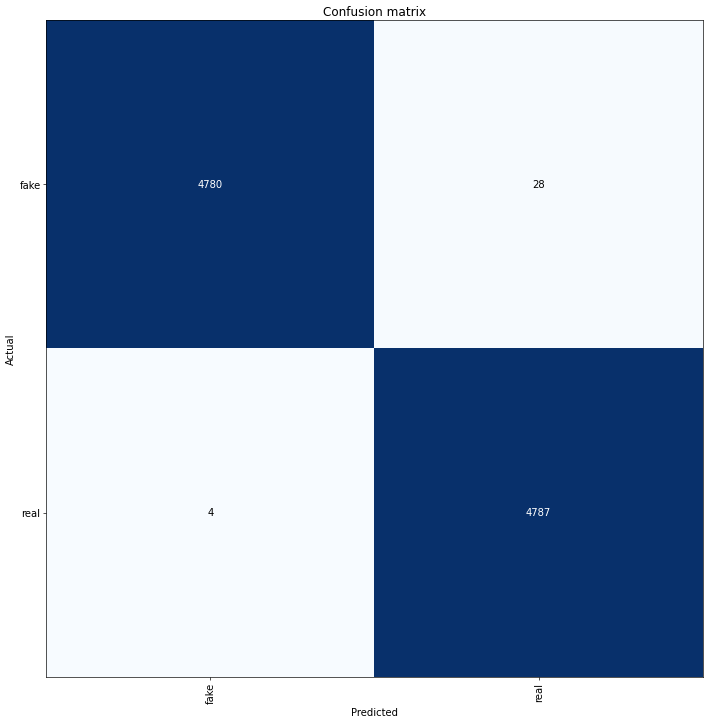

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('fake', 'real', 28)]

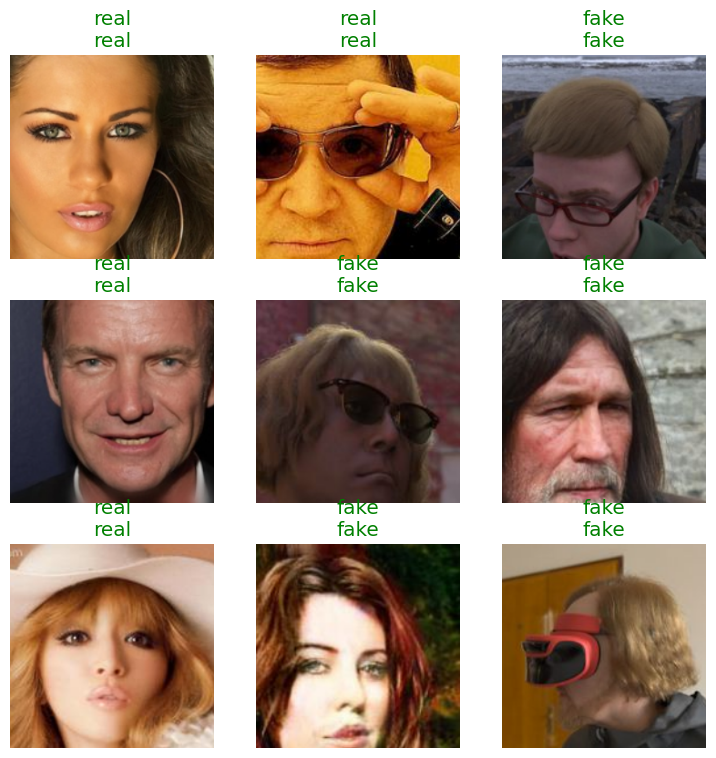

In [ ]:
learner.show_results(shuffle=True)

In [ ]:
learner.export("fakeorreal.pkl")

In [ ]:
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

model = load_learner('fakeorreal.pkl')

Test

KeyboardInterrupt: 

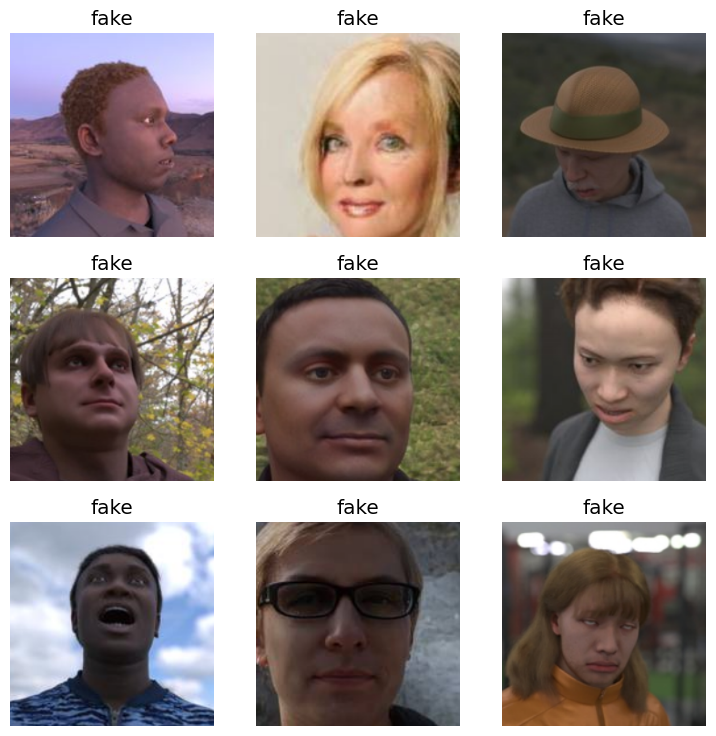

In [ ]:
tst_files = get_image_files('test')
tst_dl = dls.test_dl(tst_files, with_labels=True)
tst_dl.show_batch(max_n=9)
preds, y = model.get_preds(dl=tst_dl)
acc = accuracy(preds, y)
print(acc)